In [37]:
import pandas as pd

fbdata = pd.read_csv('./fb5.csv', skipinitialspace=True, low_memory=False)
goog= pd.read_csv('./googl.csv', skipinitialspace=True, low_memory=False)
aapl= pd.read_csv('./aapl5.csv', skipinitialspace=True, low_memory=False)
lll= pd.read_csv('./lll5.csv', skipinitialspace=True, low_memory=False)
ng= pd.read_csv('./ng5.csv', skipinitialspace=True, low_memory=False)

In [38]:
fbdata['Date'] = pd.to_datetime(fbdata['Date'])  ##tell pandas its a date
fbdata.set_index('Date', inplace=True)

fbdata['Year'] = fbdata.index.year
fbdata['Month'] = fbdata.index.month

goog['Date'] = pd.to_datetime(goog['Date'])  ##tell pandas its a date
goog.set_index('Date', inplace=True)

goog['Year'] = goog.index.year
goog['Month'] = goog.index.month

aapl['Date'] = pd.to_datetime(aapl['Date'])  ##tell pandas its a date
aapl.set_index('Date', inplace=True)

aapl['Year'] = aapl.index.year
aapl['Month'] = aapl.index.month

lll['Date'] = pd.to_datetime(lll['Date'])  ##tell pandas its a date
lll.set_index('Date', inplace=True)
lll['Year'] = lll.index.year
lll['Month'] = lll.index.month


ng['Date'] = pd.to_datetime(ng['Date'])  ##tell pandas its a date
ng.set_index('Date', inplace=True)
ng['Year'] = ng.index.year
ng['Month'] = ng.index.month


##I'm going to end up with like 20 of these, so I'm going to need to figure out a way to automate these steps

In [44]:
aapl['abspc_change']=(abs((aapl['Open'] - aapl['Close'])/aapl['Open'] ))*100
aapl['change']=(aapl['Open'] - aapl['Close'])
aapl['pc_change']=(aapl['Open'] - aapl['Close'])/aapl['Open']*100

lll['abspc_change']=(abs((lll['Open'] - lll['Close'])/lll['Open'] ))*100
lll['change']=(lll['Open'] - lll['Close'])
lll['pc_change']=(lll['Open'] - lll['Close'])/lll['Open']*100

ng['abspc_change']=(abs((ng['Open'] - ng['Close'])/ng['Open'] ))*100
ng['change']=(ng['Open'] - ng['Close'])
ng['pc_change']=(ng['Open'] - ng['Close'])/ng['Open']*100

In [29]:
ng.head(5)


,Open,High,Low,Close,Volume,Year,Month,abspc_change,change,pc_change
Date,,,,,,,,,,
2017-06-30,255.77,257.77,255.56,256.71,581416,2017,6,0.367518,-0.94,-0.367518
2017-06-29,257.84,257.84,252.82,254.88,643921,2017,6,1.147999,2.96,1.147999
2017-06-28,256.65,258.31,256.13,257.56,404885,2017,6,0.354568,-0.91,-0.354568
2017-06-27,255.49,257.33,255.17,255.33,546371,2017,6,0.062625,0.16,0.062625
2017-06-26,257.83,259.91,255.66,255.95,841339,2017,6,0.729163,1.88,0.729163


In [ ]:
### i'm debating different things to look at.  Maybe I want to look at days of high trading volumes and see if i can predict 
the direction or if it happens

In [15]:
lll['pc_change'].describe()

count    1257.000000
mean       -0.092763
std         1.055022
min        -7.479675
25%        -0.633767
50%        -0.065312
75%         0.452027
max         5.818966
Name: pc_change, dtype: float64

In [38]:
aapl.describe()
aapl['Volume'].describe()
aaplhv=aapl[aapl.Volume > 8.387052e+07]  ##arbitrarily using the 
print aaplhv.head()

              Open    High     Low   Close     Volume  Year  Month
Date                                                              
2017-02-01  127.03  130.49  127.01  128.75  111985040  2017      2
2016-09-15  113.86  115.73  113.49  115.57   90613177  2016      9
2016-09-14  108.73  113.03  108.60  111.77  112340318  2016      9
2016-07-27  104.26  104.35  102.75  102.95   92344820  2016      7
2016-04-27   96.00   98.71   95.68   97.82  113538389  2016      4


In [99]:
##what you see here is largely a train of thought, when i figoure out how to automate these tasks theyll be at part 1

#aaplhv['pc_change']=(aaplhv['Open'] - aaplhv['Close'])/aaplhv['Open'] 
#aaplhv['abspc_change']=abs((aaplhv['Open'] - aaplhv['Close'])/aaplhv['Open'] )
aaplhv.head()

,Open,High,Low,Close,Volume,Year,Month,change,pc_change,abspc_change
Date,,,,,,,,,,
2017-02-01,127.03,130.49,127.01,128.75,111985040,2017,2,-1.72,-0.013540,0.013540
2016-09-15,113.86,115.73,113.49,115.57,90613177,2016,9,-1.71,-0.015018,0.015018
2016-09-14,108.73,113.03,108.60,111.77,112340318,2016,9,-3.04,-0.027959,0.027959
2016-07-27,104.26,104.35,102.75,102.95,92344820,2016,7,1.31,0.012565,0.012565
2016-04-27,96.00,98.71,95.68,97.82,113538389,2016,4,-1.82,-0.018958,0.018958


In [17]:

#data['Year'].head
import seaborn as sb
%matplotlib inline


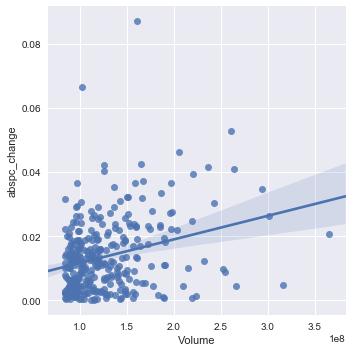

In [100]:
sb.lmplot(x="Volume", y="abspc_change", data=aaplhv)

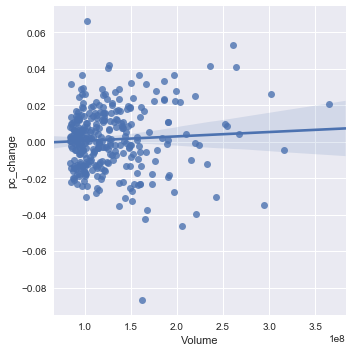

In [101]:
sb.lmplot(x="Volume", y="pc_change", data=aaplhv)

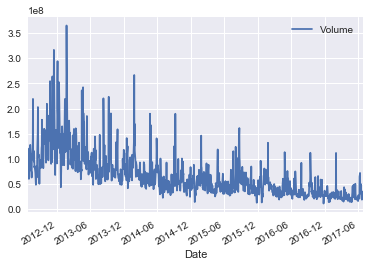

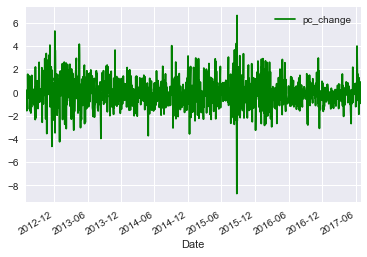

In [125]:
ax=aapl[['Volume']].plot()
aapl[['pc_change']].plot( color='green')



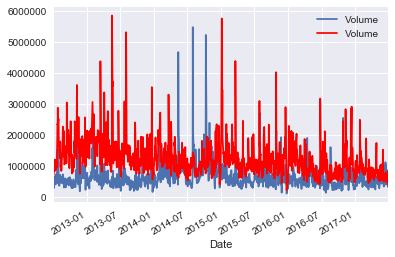

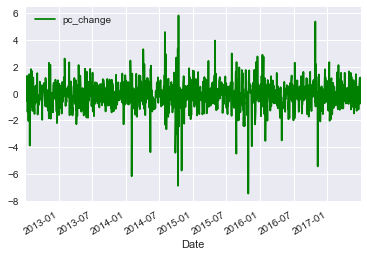

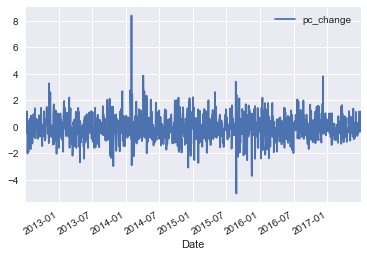

In [46]:
ax=lll[['Volume']].plot()  ###defense company 1
ng[['Volume']].plot(ax=ax, color="red")  ###defense company 2
ax2=lll[['pc_change']].plot( color='green')


#ng[['Volume']].plot(ax=ax)  ###defense company 2
ng[['pc_change']].plot()



In [56]:
from scipy import stats
#stats.pearsonr(ng['Volume'], lll['Volume']) #.24, 2.59e-18
               
stats.pearsonr(ng['pc_change'], lll['pc_change'])



(0.24272983208292387, 2.5903381245276076e-18)

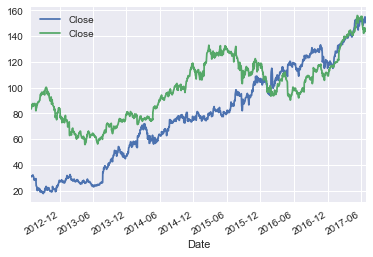

In [87]:
#fbdata[['Close']].plot()
ax=fbdata[['Close']].plot()
#goog[['Close']].plot(ax=ax)
#goog[['Close']].plot()
aapl[['Close']].plot(ax=ax)


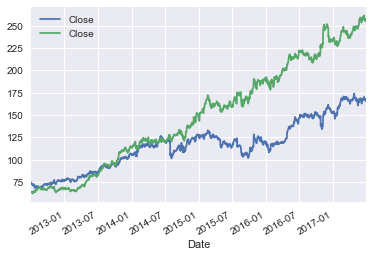

In [57]:
#fbdata[['Close']].plot()
ax=lll[['Close']].plot()
#goog[['Close']].plot(ax=ax)
#goog[['Close']].plot()
ng[['Close']].plot(ax=ax)



In [130]:
from TwitterAPI import TwitterAPI
access_token_key = "4879594762-f1l7flCgkbCqHDRrMy2S24wiTfU4fPvtyGy4JTp"
access_token_secret = "6GjVgHKGijy1Nf0pbkuAos60BxVBPmouhpoZM146SGmBj"

api_key = "yjEfKLHbzjcSTPPjklfVodAeI"
api_secret = "Z0z4M5PNC4hwXB82CI7JuVRttsgPiOckXxdXLH9LnUeICylrMR"

_debug = 0


api = TwitterAPI(api_key, api_secret, access_token_key, access_token_secret)

'''
Construct, sign, and open a twitter request
using the hard-coded credentials above.
'''

def retrieve_tweets(Apple, 
                    url="https://stream.twitter.com/1/statuses/filter.json", 
                    method="GET", ):
    """

    Params:
    topic - must be in this format "#topic" or '@handle"
    Returns
    """
    response = api.request('statuses/filter', {'track': topic})
    if response.status_code != 200:
        raise ValueError("Unable to retrieve tweets, please check your API credentials")
    for x in response:
        try:
            yield x
        except UnicodeError as unicode_error:
            continue            
            
            
            

In [140]:
r = api.request('statuses/update', {'status':'This is a testing!'})
print (r.status_code) 

print (r.text)



200
{"created_at":"Sun Jul 02 06:28:22 +0000 2017","id":881399130593021952,"id_str":"881399130593021952","text":"This is a testing!","truncated":false,"entities":{"hashtags":[],"symbols":[],"user_mentions":[],"urls":[]},"source":"\u003ca href=\"http:\/\/www.ewaborucki.com\" rel=\"nofollow\"\u003eewa_gads\u003c\/a\u003e","in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4879594762,"id_str":"4879594762","name":"Emma","screen_name":"mzemmaz","location":"","description":"","url":null,"entities":{"description":{"urls":[]}},"protected":false,"followers_count":0,"friends_count":0,"listed_count":0,"created_at":"Sat Feb 06 01:03:55 +0000 2016","favourites_count":0,"utc_offset":null,"time_zone":null,"geo_enabled":false,"verified":false,"statuses_count":3,"lang":"en","contributors_enabled":false,"is_translator":false,"is_translation_enabled":false,"profile_background_color":"F5F8FA","

In [152]:
r = api.request('search/tweets', {'q': "Trump"})

for item in r:
    print(item['text'] if 'text' in item else item)

print('\nQUOTA: %s' % r.get_rest_quota())

RT @AnneRiceAuthor: Trump may indeed be removed from office. https://t.co/s3lVAYh9LY
@JYSexton I know the game is to find ad many "angles" on anything trump does....but retweeting a gif?.... this is reaching.
RT @WayneJ28791698: POTUS TRUMP the People's President https://t.co/itBAUZz146
RT @StarbuckRyan12: "Trump tweets cartoon of Tom and Jerry, seeming to advocate for the extinction of mice." Y'all take this stuff too far…
RT @brianklaas: I study despots. They attack &amp; demonize the press to erode independent sources of truth

Trump's tweets aren't funny. They'…
RT @mitchellreports: Reporters Committee for Freedom of Press condemns Trump tweet as threat of violence against journalists beneath  offic…
RT @thehill: CNN fires back at Trump: We'll keep doing our jobs, he should do his https://t.co/swwWwz1GDL https://t.co/QJnvEraEel
RT @joncoopertweets: 🔥🔥WH source: Trump was FURIOUS to learn calls to remove him from office by invoking #25thAmendment are trending on Twi…
RT @Bill_Rhodes

In [6]:
import twitter
dir(twitter)
#tweets=twitter.retrieve_tweets("Apple", url="https://stream.twitter.com/1/statuses/filter.json" )
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")



NameError: name 'api' is not defined

In [153]:
from __future__ import print_function
import sys

import twitter

if __name__ == '__main__':
    results = twitter.retrieve_tweets(topic=sys.args[1])
    out = open('../dataset/captured-tweets.txt', 'ab')
    # The tweet is stored with key 'text',
    i = 0
    for result in results:
        # Filter to english tweets
        if result['lang'] == 'en':
            out.write((result['text'] + "\n").encode('utf-8'))
            i += 1
        # Defaulting to capturing 5000, this takes a long time...
        if i == 5000:
            exit()

AttributeError: 'module' object has no attribute 'retrieve_tweets'

ERROR:root:Cell magic `%%pip` not found.


In [66]:
#3. Run `python capture-tweets.py <topic>` to save tweets to file called `captured-tweets.txt` related to 
#`<topic>`. I.e.: `python capture-tweets.py Google` or `python capture-tweets.py Iran`

capture-tweets.py(Apple)



NameError: name 'capture' is not defined